https://colab.research.google.com/github/ultralytics/yolov3/blob/master/tutorial.ipynb#scrollTo=wbvMlHd_QwMG

https://github.com/WongKinYiu/PyTorch_YOLOv4

https://github.com/ultralytics/yolov3

In [1]:
import os, sys, random, shutil

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

#yolov3 keras er ta
!unzip /content/drive/MyDrive/YoloV3/YoloV3_416.zip -d /content


Archive:  /content/drive/MyDrive/YoloV3/YoloV3_416.zip
 extracting: /content/README.dataset.txt  
 extracting: /content/README.roboflow.txt  
 extracting: /content/data.yaml      
   creating: /content/train/
   creating: /content/train/images/
 extracting: /content/train/images/00511_jpg.rf.e26701933cc1c57f1dc4db60ad6e685b.jpg  
 extracting: /content/train/images/00541_jpg.rf.8df7ca4292faedac6aa67626f4be02dd.jpg  
 extracting: /content/train/images/00601_jpg.rf.9805276f5ae5d42aecfc3528c6b2b017.jpg  
 extracting: /content/train/images/00691_jpg.rf.2bc5be45595e532eac299e4b0719015e.jpg  
 extracting: /content/train/images/00721_jpg.rf.03727b0eda14c4147ea1e899c1bf9c40.jpg  
 extracting: /content/train/images/00841_jpg.rf.e9b093c4599f65dbcade6f930cc36fc0.jpg  
 extracting: /content/train/images/00991_jpg.rf.d241f4eb519e8b9d22c40c9d13e04ef4.jpg  
 extracting: /content/train/images/01021_jpg.rf.01347f0b8e62809ad558d7cc905019dc.jpg  
 extracting: /content/train/images/01051_jpg.rf.2dba0c77894

In [4]:
%pwd

'/content'

In [5]:
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

Setup complete ✅


In [6]:
#source,Destination

shutil.copyfile('/content/drive/MyDrive/YoloV3/YoloV3_416.yaml','/content/yolov3/data/YoloV3_416.yaml')


'/content/yolov3/data/YoloV3_416.yaml'

In [7]:

#shutil.copyfile('/content/drive/MyDrive/YoloV3/yolov3.yaml','/content/yolov3/models/yolov3.yaml')


In [8]:

shutil.copyfile('/content/drive/MyDrive/YoloV3/yolov3.yaml','/content/yolov3/models/yolov3-tiny.yaml')


'/content/yolov3/models/yolov3-tiny.yaml'

In [9]:
#display.Image(filename='/content/yolov3/data/images/car.jpg', width=600)

In [10]:
# Run YOLOv3 on COCO val
#!python val.py --weights yolov3-tiny.pt --data car_1280_1980.yaml --img 1280 --iou 0.65 --half

In [11]:

!python train.py --img 416 --batch 16 --epochs 400 --data YoloV3_416.yaml --weights yolov3-tiny.pt --cache


train: weights=yolov3-tiny.pt, cfg=, data=YoloV3_416.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=400, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-27-gdd838e2 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0

In [ ]:

#!python train.py --img 416 --batch 16 --epochs 150 --data car_detection.yaml --weights yolov3.pt --cache


**Detection of a dataset**

In [ ]:


!python detect.py --weights /content/drive/MyDrive/YoloV3/best_weight/best.pt --img 416 --conf 0.25 --source /content/valid/00751_jpg.rf.6d1ccd8b9e7ebc02bd50ec5fddfd3adf.jpg


detect: weights=['/content/drive/MyDrive/YoloV3/best_weight/best.pt'], source=/content/valid/00751_jpg.rf.6d1ccd8b9e7ebc02bd50ec5fddfd3adf.jpg, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-27-gdd838e2 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.5 GFLOPs
image 1/1 /content/valid/00751_jpg.rf.6d1ccd8b9e7ebc02bd50ec5fddfd3adf.jpg: 416x416 1 car, Done. (0.037s)
Speed: 0.4ms pre-process, 36.8ms inference, 22.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp5


In [ ]:

# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

00751_jpg.rf.6d1ccd8b9e7ebc02bd50ec5fddfd3adf.jpg


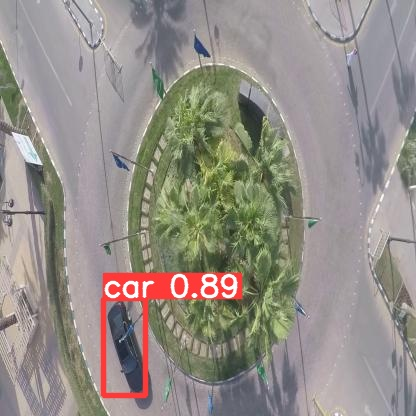

In [ ]:
# plot just one random image prediction
filename = random.choice(os.listdir('/content/yolov3/runs/detect/exp5'))
print(filename)
Image('/content/yolov3/runs/detect/exp5/' + filename)

In [ ]:

# convert images to numPy
def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))
    

In [ ]:
# grab all images from our output directory
images = [ PIL.Image.open(f) for f in glob('/content/yolov3/runs/detect/exp5/*') ]

In [ ]:

# create array of numPy images
np_images = [ img2array(im) for im in images ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


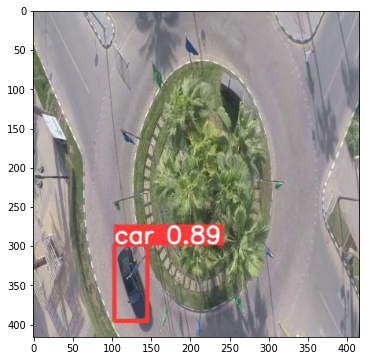

In [ ]:

# plot ALL results in test directory (NOTE: adjust figsize as you please)
for img in np_images:
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    